                ░      ┌───┐ ░ ┌─┐                     
q_0: ───────────░───■──┤ H ├─░─┤M├────────────────■────
     ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐             │    
q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├────■────────┼────
     └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘┌───┴───┐┌───┴───┐
q_2: ─────┤ X ├─░────────────░──╫──╫─┤ Rx(π) ├┤ Rz(π) ├
          └───┘ ░            ░  ║  ║ └───╥───┘└───╥───┘
                                ║  ║  ┌──╨──┐  ┌──╨──┐ 
c: 4/═══════════════════════════╩══╩══╡ 0x1 ╞══╡ 0x1 ╞═
                                0  1  └─────┘  └─────┘ 

Measurement counts: {'0001': 265, '0010': 230, '0000': 252, '0011': 253}


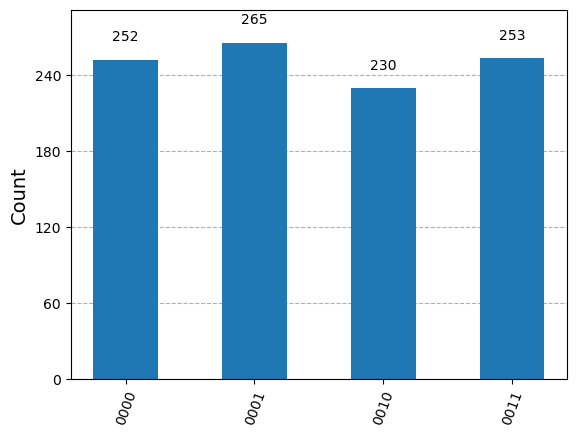

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit.compiler import transpile
from numpy import pi

# create registers and circuit
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# add gates
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q)
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.crx(pi, qreg_q[1], qreg_q[2]).c_if(creg_c, 1)
circuit.crz(pi, qreg_q[0], qreg_q[2]).c_if(creg_c, 1)

# print the circuit
print(circuit)

# create a simulator
simulator = Aer.get_backend('qasm_simulator')

# transpile and run the circuit
transpiled_circuit = transpile(circuit, simulator)
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()

# get the counts of measurement results
counts = result.get_counts()
print("\nMeasurement counts:", counts)

# visualize the results
plot_histogram(counts)